In [1]:
import numpy as np
import matplotlib.pyplot as plt
import logging
import cPickle as pickle
%matplotlib inline
plt.style.use('ggplot')
%load_ext autoreload
%autoreload 2

logger = logging.getLogger()
logger.setLevel("INFO") 
logger.handlers = [logging.StreamHandler()] 
seed = 20161121
rng = np.random.RandomState(seed)

In [2]:
from mlp.models import MultipleLayerModel
from mlp.layers import AffineLayer, ConvolutionalLayer, MaxPoolingLayer, ReshapeLayer
from mlp.layers import SigmoidLayer, TanhLayer, ReluLayer, DropoutLayer
from mlp.data_providers import MNISTDataProvider, MNISTCNNAutoencoderDataProvider, MNISTCNNDataProvider
from mlp.data_providers import MNISTCNNDenoisingAutoencoderDataProvider
from mlp.errors import CNNSumOfSquaredDiffsError, CrossEntropySoftmaxError
from mlp.learning_rules import GradientDescentLearningRule, MomentumLearningRule
from mlp.schedulers import ConstantLearningRateScheduler, ExponentialLearningRateScheduler
from mlp.penalties import L1Penalty, L2Penalty
from mlp.initialisers import GlorotUniformInit, ConstantInit, UniformInit
from mlp.optimisers import Optimiser
from mlp.settings import Setting
from mlp.experiments import Experiment

In [3]:
kernels_init = UniformInit(-0.01,0.01,rng=rng)
weights_init = GlorotUniformInit(rng=rng)
biases_init = ConstantInit(0.)

learning_rule = MomentumLearningRule(learning_rate=0.02, mom_coeff=0.9)
error = CrossEntropySoftmaxError()
ae_error = CNNSumOfSquaredDiffsError()

Epoch 0:
  error(train)=2.30e+00, acc(train)=1.06e-01, error(valid)=2.30e+00, acc(valid)=9.93e-02, params_penalty=0.00e+00
Epoch 1: 50.93s to complete
  error(train)=1.57e-01, acc(train)=9.56e-01, error(valid)=1.52e-01, acc(valid)=9.58e-01, params_penalty=0.00e+00
Epoch 2: 55.90s to complete
  error(train)=9.38e-02, acc(train)=9.73e-01, error(valid)=9.87e-02, acc(valid)=9.73e-01, params_penalty=0.00e+00
Epoch 3: 57.10s to complete
  error(train)=6.93e-02, acc(train)=9.80e-01, error(valid)=8.03e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00
Epoch 4: 64.33s to complete
  error(train)=5.89e-02, acc(train)=9.83e-01, error(valid)=7.62e-02, acc(valid)=9.79e-01, params_penalty=0.00e+00
Epoch 5: 54.41s to complete
  error(train)=4.32e-02, acc(train)=9.88e-01, error(valid)=6.27e-02, acc(valid)=9.81e-01, params_penalty=0.00e+00
Epoch 6: 53.90s to complete
  error(train)=3.92e-02, acc(train)=9.89e-01, error(valid)=6.38e-02, acc(valid)=9.81e-01, params_penalty=0.00e+00
Epoch 7: 56.07s to comple

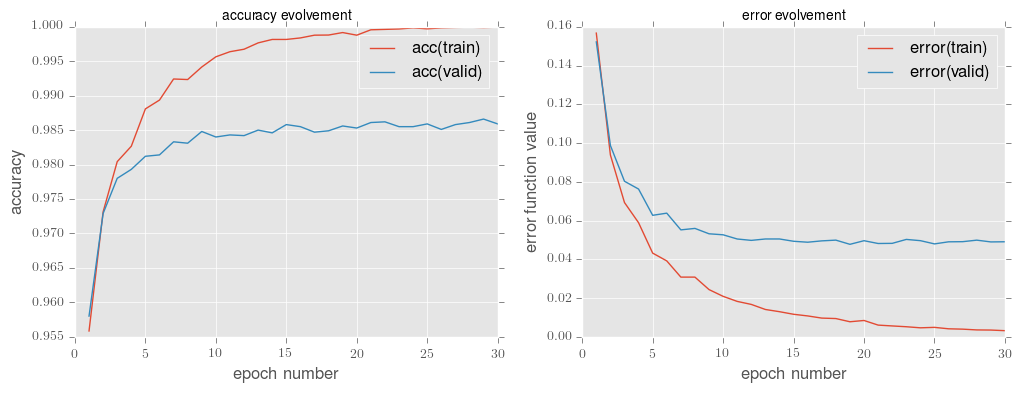

In [6]:
train_set = MNISTCNNDataProvider(which_set='train', batch_size=100, max_num_batches=-1, rng=rng)
valid_set = MNISTCNNDataProvider(which_set='valid', batch_size=100, max_num_batches=-1, rng=rng)


layers = [
    ConvolutionalLayer(num_input_channels=1, num_output_channels=4, 
                       input_dim_1=28, input_dim_2=28, 
                       kernel_dim_1=5, kernel_dim_2=5, kernels_init=kernels_init),
    TanhLayer(),
    MaxPoolingLayer(),
    ReshapeLayer(),
    AffineLayer(input_dim=12*12*4, output_dim=100, weights_initialiser=weights_init),
    TanhLayer(),
    AffineLayer(input_dim=100, output_dim=10, weights_initialiser=weights_init),
]

model = MultipleLayerModel(layers)
setting = Setting(model, error, learning_rule, train_set, valid_set)

remark = "CNN Shallow"
settings = [setting]
experiment = Experiment(settings=settings, num_epoch=30, stats_interval=1, remark=remark)
experiment.do_experiment()

In [7]:
with open("cnn_shallow_model.pkl", 'wb') as f:
    pickle.dump(model, f)

Epoch 0:
  error(train)=2.30e+00, acc(train)=1.06e-01, error(valid)=2.30e+00, acc(valid)=1.10e-01, params_penalty=0.00e+00
Epoch 1: 66.74s to complete
  error(train)=4.77e-01, acc(train)=8.53e-01, error(valid)=4.39e-01, acc(valid)=8.64e-01, params_penalty=0.00e+00
Epoch 2: 61.98s to complete
  error(train)=4.03e-01, acc(train)=8.75e-01, error(valid)=3.69e-01, acc(valid)=8.88e-01, params_penalty=0.00e+00
Epoch 3: 59.45s to complete
  error(train)=3.61e-01, acc(train)=8.89e-01, error(valid)=3.34e-01, acc(valid)=8.99e-01, params_penalty=0.00e+00
Epoch 4: 58.96s to complete
  error(train)=3.30e-01, acc(train)=8.97e-01, error(valid)=3.14e-01, acc(valid)=9.00e-01, params_penalty=0.00e+00
Epoch 5: 64.34s to complete
  error(train)=3.12e-01, acc(train)=9.05e-01, error(valid)=2.77e-01, acc(valid)=9.16e-01, params_penalty=0.00e+00
Epoch 6: 60.62s to complete
  error(train)=3.05e-01, acc(train)=9.06e-01, error(valid)=2.71e-01, acc(valid)=9.18e-01, params_penalty=0.00e+00
Epoch 7: 64.24s to comple

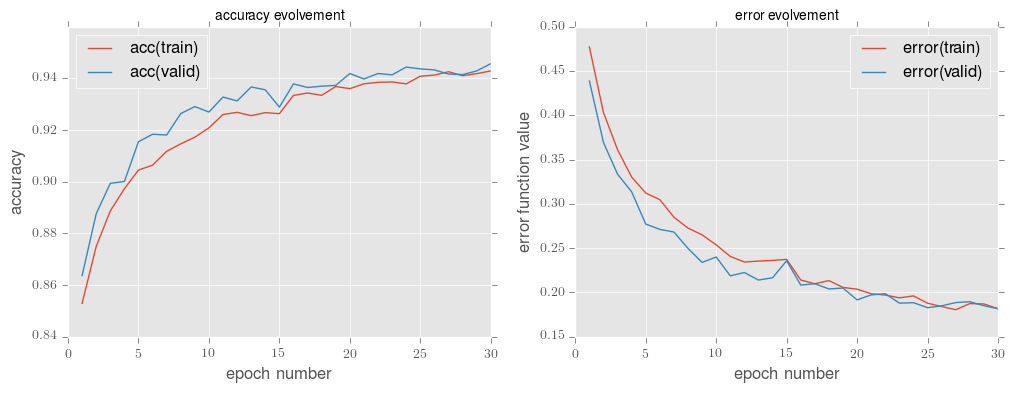

In [4]:
train_set = MNISTCNNDataProvider(which_set='train', batch_size=100, max_num_batches=-1, rng=rng)
valid_set = MNISTCNNDataProvider(which_set='valid', batch_size=100, max_num_batches=-1, rng=rng)


layers = [
    DropoutLayer(incl_prob=0.5),
    ConvolutionalLayer(num_input_channels=1, num_output_channels=4, 
                       input_dim_1=28, input_dim_2=28, 
                       kernel_dim_1=5, kernel_dim_2=5, kernels_init=kernels_init),
    TanhLayer(),
    DropoutLayer(incl_prob=0.9),
    MaxPoolingLayer(),
    ReshapeLayer(),
    AffineLayer(input_dim=12*12*4, output_dim=100, weights_initialiser=weights_init),
    TanhLayer(),
    DropoutLayer(incl_prob=0.5),
    AffineLayer(input_dim=100, output_dim=10, weights_initialiser=weights_init),
]

model = MultipleLayerModel(layers)
setting = Setting(model, error, learning_rule, train_set, valid_set)

remark = "CNN Shallow dropout"
settings = [setting]
experiment = Experiment(settings=settings, num_epoch=30, stats_interval=1, remark=remark)
experiment.do_experiment()

Epoch 0:
  error(train)=2.30e+00, acc(train)=1.03e-01, error(valid)=2.30e+00, acc(valid)=1.05e-01, params_penalty=0.00e+00
Epoch 1: 419.29s to complete
  error(train)=1.25e-01, acc(train)=9.63e-01, error(valid)=1.21e-01, acc(valid)=9.67e-01, params_penalty=0.00e+00
Epoch 2: 425.09s to complete
  error(train)=7.67e-02, acc(train)=9.77e-01, error(valid)=8.32e-02, acc(valid)=9.75e-01, params_penalty=0.00e+00
Epoch 3: 418.33s to complete
  error(train)=6.14e-02, acc(train)=9.82e-01, error(valid)=7.00e-02, acc(valid)=9.80e-01, params_penalty=0.00e+00
Epoch 4: 415.25s to complete
  error(train)=4.63e-02, acc(train)=9.86e-01, error(valid)=6.08e-02, acc(valid)=9.83e-01, params_penalty=0.00e+00
Epoch 5: 416.23s to complete
  error(train)=4.08e-02, acc(train)=9.88e-01, error(valid)=5.65e-02, acc(valid)=9.84e-01, params_penalty=0.00e+00
Epoch 6: 424.27s to complete
  error(train)=3.57e-02, acc(train)=9.89e-01, error(valid)=5.28e-02, acc(valid)=9.84e-01, params_penalty=0.00e+00
Epoch 7: 424.94s to

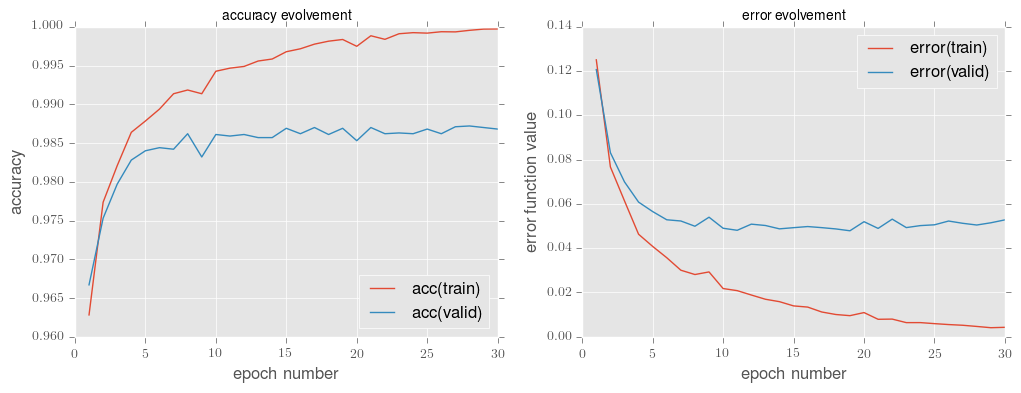

In [9]:
train_set = MNISTCNNDataProvider(which_set='train', batch_size=100, max_num_batches=-1, rng=rng)
valid_set = MNISTCNNDataProvider(which_set='valid', batch_size=100, max_num_batches=-1, rng=rng)


layers = [
    ConvolutionalLayer(num_input_channels=1, num_output_channels=4, 
                       input_dim_1=28, input_dim_2=28, 
                       kernel_dim_1=5, kernel_dim_2=5, kernels_init=kernels_init),
    TanhLayer(),
    MaxPoolingLayer(),
    ConvolutionalLayer(num_input_channels=4, num_output_channels=12, 
                       input_dim_1=12, input_dim_2=12, 
                       kernel_dim_1=5, kernel_dim_2=5, kernels_init=kernels_init),
    TanhLayer(),
    MaxPoolingLayer(),
    ReshapeLayer(),
    AffineLayer(input_dim=4*4*12, output_dim=100, weights_initialiser=weights_init),
    TanhLayer(),
    AffineLayer(input_dim=100, output_dim=10, weights_initialiser=weights_init),
]

model = MultipleLayerModel(layers)
setting = Setting(model, error, learning_rule, train_set, valid_set)

remark = "CNN deep tanh"
settings = [setting]
experiment = Experiment(settings=settings, num_epoch=30, stats_interval=1, remark=remark)
experiment.do_experiment()

In [10]:
train_set = MNISTCNNDataProvider(which_set='train', batch_size=100, max_num_batches=-1, rng=rng)
valid_set = MNISTCNNDataProvider(which_set='valid', batch_size=100, max_num_batches=-1, rng=rng)


layers = [
    ConvolutionalLayer(num_input_channels=1, num_output_channels=4, 
                       input_dim_1=28, input_dim_2=28, 
                       kernel_dim_1=5, kernel_dim_2=5, kernels_init=kernels_init),
    ReluLayer(),
    MaxPoolingLayer(),
    ConvolutionalLayer(num_input_channels=4, num_output_channels=12, 
                       input_dim_1=12, input_dim_2=12, 
                       kernel_dim_1=5, kernel_dim_2=5, kernels_init=kernels_init),
    ReluLayer(),
    MaxPoolingLayer(),
    ReshapeLayer(),
    AffineLayer(input_dim=4*4*12, output_dim=100, weights_initialiser=weights_init),
    ReluLayer(),
    AffineLayer(input_dim=100, output_dim=10, weights_initialiser=weights_init),
]

model = MultipleLayerModel(layers)
setting = Setting(model, error, learning_rule, train_set, valid_set)

remark = "CNN deep relu"
settings = [setting]
experiment = Experiment(settings=settings, num_epoch=30, stats_interval=1, remark=remark)
experiment.do_experiment()

Epoch 0:
  error(train)=2.30e+00, acc(train)=1.00e-01, error(valid)=2.30e+00, acc(valid)=1.03e-01, params_penalty=0.00e+00


KeyboardInterrupt: 